# 1. Generate 200 training data by randomly selecting x1, x2 within the interval [−1,1]

In [1]:
import numpy as np

# Number of training samples
N_train = 200

# Generate random x1 and x2 in [-1, 1]
x1_train = np.random.uniform(-1, 1, N_train)
x2_train = np.random.uniform(-1, 1, N_train)

# 2. Train the network and find the weights and biases.

In [2]:
# Calculate f(x1, x2)
y_train = (1 - x1_train)**2 + 100 * (x2_train - x1_train**2)**2

# Combine x1 and x2 into a single array for convenience
X_train = np.vstack((x1_train, x2_train)).T

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (200, 2)
Shape of y_train: (200,)


In [3]:

# Hyperparameters
input_dim = 2
hidden_dim = 5
output_dim = 1
lr = 0.01
epochs = 1000

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(hidden_dim, input_dim)
b1 = np.zeros((hidden_dim, 1))
W2 = np.random.randn(output_dim, hidden_dim)
b2 = np.zeros((output_dim, 1))

# Before training loop ends
print(" W1 (weights from input to hidden):")
print(W1)

print("\n b1 (biases for hidden layer):")
print(b1)

print("\n W2 (weights from hidden to output):")
print(W2)

print("\n b2 (bias for output layer):")
print(b2)

# Reshape data
X = X_train.T  # shape: (2, N)
Y = y_train.reshape(1, -1)  # shape: (1, N)

# Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(W1, X) + b1  # shape: (hidden_dim, N)
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2  # shape: (1, N)
    Y_hat = Z2  # linear output

    # Loss
    loss = np.mean((Y_hat - Y) ** 2)

    # Backward pass
    dZ2 = 2 * (Y_hat - Y) / Y.shape[1]  # shape: (1, N)
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

print("Training complete!")


 W1 (weights from input to hidden):
[[ 0.49671415 -0.1382643 ]
 [ 0.64768854  1.52302986]
 [-0.23415337 -0.23413696]
 [ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]

 b1 (biases for hidden layer):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

 W2 (weights from hidden to output):
[[-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]]

 b2 (bias for output layer):
[[0.]]
Epoch 0, Loss: 7700.6931
Epoch 100, Loss: 2079.2750
Epoch 200, Loss: 1879.1452
Epoch 300, Loss: 1798.7129
Epoch 400, Loss: 1760.6545
Epoch 500, Loss: 1741.4164
Epoch 600, Loss: 1728.8176
Epoch 700, Loss: 1718.7438
Epoch 800, Loss: 1709.7947
Epoch 900, Loss: 1698.9820
Training complete!


In [4]:
# After training loop ends
print("Final W1 (weights from input to hidden):")
print(W1)

print("\nFinal b1 (biases for hidden layer):")
print(b1)

print("\nFinal W2 (weights from hidden to output):")
print(W2)

print("\nFinal b2 (bias for output layer):")
print(b2)


Final W1 (weights from input to hidden):
[[  0.12712434 -17.19937086]
 [  1.95825914 -12.8303604 ]
 [  0.25118453 -19.03138061]
 [ -1.95774143  -8.8877676 ]
 [  0.83846032 -17.68524073]]

Final b1 (biases for hidden layer):
[[-15.31524154]
 [ -7.10498802]
 [-17.08334516]
 [ -5.13332525]
 [ -2.42806914]]

Final W2 (weights from hidden to output):
[[45.36426657 37.20901281 47.31689055 26.20648413 30.01477575]]

Final b2 (bias for output layer):
[[20.93753335]]


# 3. Generate 100 test data by randomly selecting x1, x2 within the interval [−1,1].

In [5]:
# Number of test samples
N_test = 100

# Generate random x1 and x2
x1_test = np.random.uniform(-1, 1, N_test)
x2_test = np.random.uniform(-1, 1, N_test)

# Compute f(x1, x2)
y_test = (1 - x1_test)**2 + 100 * (x2_test - x1_test**2)**2

# Combine into matrix
X_test = np.vstack((x1_test, x2_test)).T

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (100, 2)
Shape of y_test: (100,)


# 4. Calculate the training and test errors (cost functions)

In [6]:
# Training error (already computed during training)
Z1_train = np.dot(W1, X) + b1
A1_train = sigmoid(Z1_train)
Z2_train = np.dot(W2, A1_train) + b2
Y_hat_train = Z2_train

train_error = np.mean((Y_hat_train - Y) ** 2)
print(f"Training Error (MSE): {train_error:.4f}")

# Test error
X_test_T = X_test.T
Y_test_true = y_test.reshape(1, -1)

Z1_test = np.dot(W1, X_test_T) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
Y_hat_test = Z2_test

test_error = np.mean((Y_hat_test - Y_test_true) ** 2)
print(f"Test Error (MSE): {test_error:.4f}")


Training Error (MSE): 1690.1284
Test Error (MSE): 1765.7989


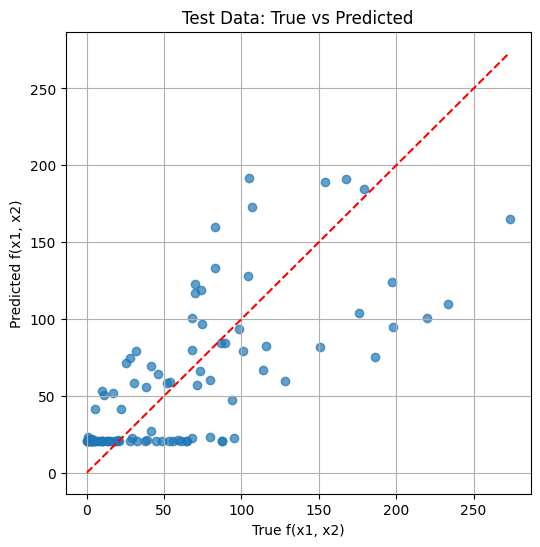

In [8]:
import matplotlib.pyplot as plt

# Predicted vs True on test data
plt.figure(figsize=(6, 6))
plt.scatter(y_test, Y_hat_test.flatten(), alpha=0.7)
plt.xlabel("True f(x1, x2)")
plt.ylabel("Predicted f(x1, x2)")
plt.title("Test Data: True vs Predicted")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y=x line
# Save the figure
plt.savefig("test_true_vs_predicted.png", dpi=300)
plt.show()
